# Project: Titanic: Exploration Data Analysis and Machine Learning from Disaster
By Guilherme Landim Frota Leitão

Date Jan, 2019


<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width="500" height="400" />

[(Font: Titanic)](https://pt.wikipedia.org/wiki/RMS_Titanic)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Machine Learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project we'll analyse the data to discouver what sorts of people were likely to survive.
We'll see statistics with data analysis and we'll use machine learning tools to predict which passengers survived the tragedy.



** Data Dictionary ** [Font: Kaggle](https://www.kaggle.com/c/titanic/data)

* Survival - If the passenger survived(1) or don't(0)
* pclass - Ticket class: 1= 1st, 2= 2nd, 3= 3rd
* sex
* age - Age in years
* sibsp - # of siblings/spouses aboard the Titanic
* parch - # of parents/children aboard the Titanic
* ticket - Ticket Number
* fare - Passenger fare
* cabin - Cabin Number
* embarked - Port of Embarkation: C=Cherbourg, Q=Queenstown, S=Southampton

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
# matplot magic line
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this segment we will Gather, Asses and Clean the Data.

### Gathering

In [2]:
#gathering datasets from csv files from KAGGLE
titanic_df = pd.read_csv("./input_data/train.csv")
test_df    = pd.read_csv("./input_data/test.csv")

### Assessing Data

In [3]:
#Preview random lines from titanic data
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q


We can notice there are passengers without Age and Cabin.

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Null values for Age
* Null values for Cabin

### Cleaning Data
In this segment we will clean the data and solve the problems above

Let's first make a copy of the dataframe

In [6]:
df = titanic_df.copy()
clean_test =test_df.copy()

Since we don't know the logic for cabins and even if a passenger has to be in a cabin we won't change this collumn.

It's better not to change the statistics, so we can fill the Age of null values as the mean of ages.

In [7]:
df['Age'] = df.Age.fillna(df.Age.mean())
clean_test['Age'] = clean_test.Age.fillna(df.Age.mean())

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
clean_test['Fare'] = clean_test.Fare.fillna(df.Age.mean())

<a id='eda'></a>
## Exploratory Data Analysis

In this segment we will explore and analyse the data to get insights. We'll use the original dataset with null values for ages, since there are 177 null points it will change considerably the statistics from the original dataset.

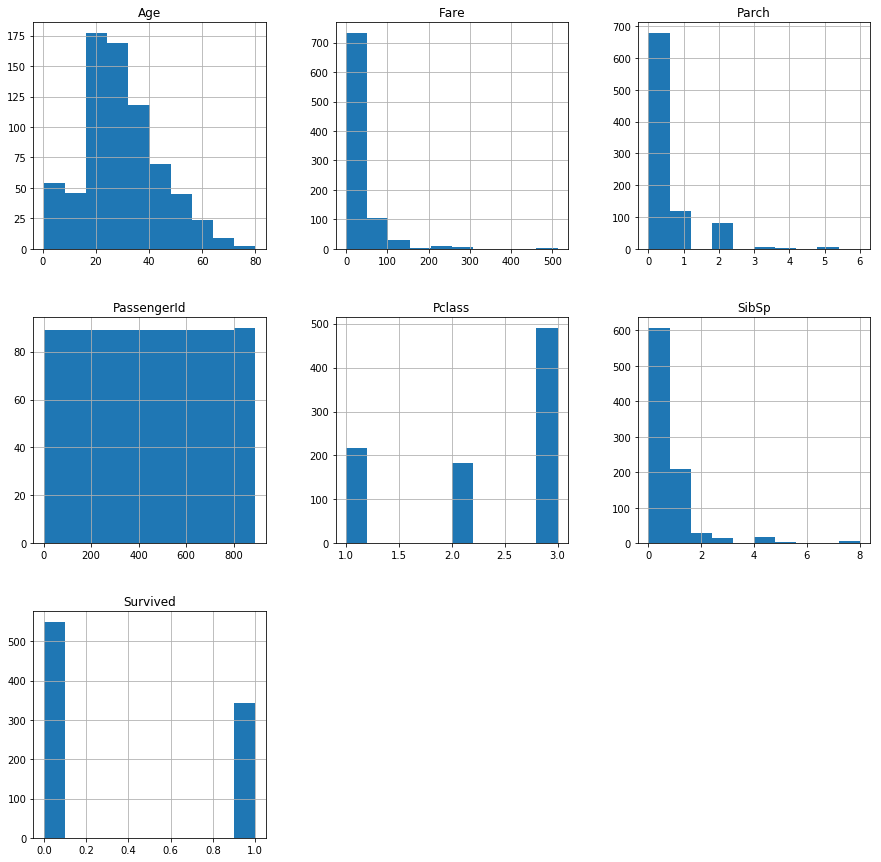

In [10]:
#plotting histograms of the columns
titanic_df.hist(figsize=[15,15]);

Let's break the dataset in two, so we can study two different groups.

In [11]:
survived = df.Survived == 1
no_survived = df.Survived == 0

> The first question we can ask is the age distribution for the passengers, and for the graphic bellow we can notice that the main age is near 30 years old, considering that people who we don't have this 

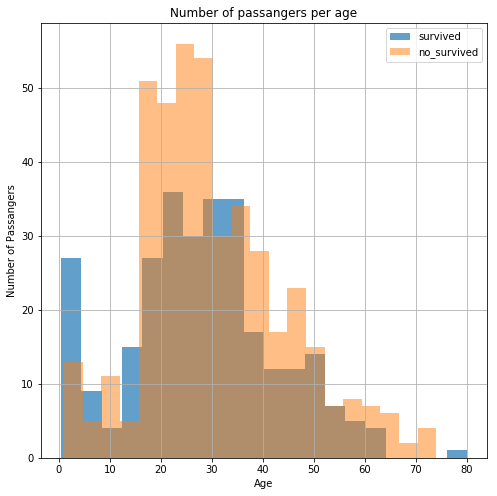

In [12]:
#plotting age vs survived/no_survived
titanic_df[survived].Age.hist(figsize = [8, 8], alpha = 0.7, bins = 20, label = "survived");
titanic_df[no_survived].Age.hist(figsize = [8, 8], alpha = 0.5, bins = 20, label = "no_survived");
plt.legend();
plt.title("Number of passangers per age");
plt.xlabel("Age");
plt.ylabel("Number of Passangers");

> Other question is the passanger class ticket. We're inclined to believe that the proportion of the 1st class, 2nd and 3rd class who survived would be different. While most of the survivors would be from 1st, than 2nd and last 3rd.

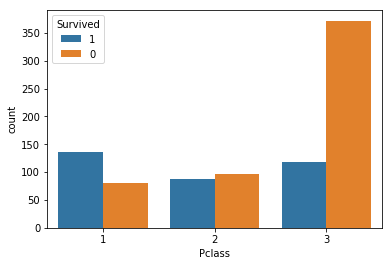

In [13]:
#plotting pclass vs survived/no_survived
g=  sns.countplot(x="Pclass",hue = "Survived", data=titanic_df, hue_order=[1,0]);

In the plot above we can see that the ideia that mosto of the survivals would be from 1st class is wrong, since there is little difference in the number of survivals from 1st and 3rd class, while the 2nd class less passangers survived.
But if we look at proportions from 1st, 2nd and 3rd class the initial ideia is right, since most of passengers from 1st class survived, almost 50% from 2nd and almost 20% from 3rd class survived.

> The next and obivious question would be about the gender.

By the code of conduct dating from 1852 ("Women and children first."), whereby the lives of women and children were to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited.

While the phrase first appeared in the 1860 novel Harrington: A Story of True Love, by William Douglas O'Connor, the first documented application of "women and children first" was in May 1840 when, after a lightning-strike, fire broke out aboard the American packet Poland en route from New York to Le Havre. According to a passenger, J.H. Buckingham of Boston.

We can assume it was used in Titanic too since the pie chart bellow shows that most of women survived (nearly 75% of them), while only nearly 20% of the men survived.

In [14]:
#Creating function to create an alias between columns gender X survived to create a pie chart
def alias(row):
    if row['Survived'] == 1 and row['Sex'] == 'male':
        val = "Male and survived"
    elif row['Survived'] == 1 and row['Sex'] == 'female':
        val = "Female and survived"
    elif row['Survived'] == 0 and row['Sex'] == 'male':
        val = "Male and don't survived"
    else:
        val = "Female and don't survived"
    return val

df_gender = titanic_df.apply(alias, axis = 1)

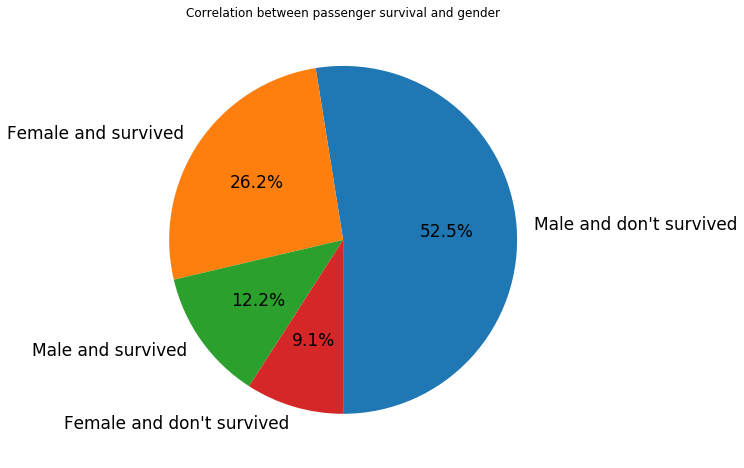

In [17]:
#Plotting pie chart by the aliases above
df_gender.value_counts().plot(kind="pie", figsize = [8, 8],  autopct='%1.1f%%', startangle=270, fontsize=17);
plt.title("Correlation between passenger survival and gender");
plt.ylabel("");
plt.xlabel("");

Let's discover if the fara passengers pay helped in the survival rate

<a id='ml'></a>
## Machine Learning

In this section we will select our the features, train, test and tune our machine learning to get good accuracy, score and recall

In [171]:
#The first feature should be the label, if the passenger survived or not.
features_list = ['Survived']
features_list += ['Pclass','Age','SibSp','Parch','Fare','Male']

In [172]:
#Creating replacing male for 1 and female for 0 in both datasets
df["Male"] = np.where(df['Sex']=='male', 1, 0)
clean_test["Male"] = np.where(clean_test['Sex']=='male', 1, 0)



In [173]:
#getting labels
#we have to use the cleaned data, because of the NaN values.
labels = df.Survived
features = df.loc[:, features_list[1:]]

In [174]:
print (labels.shape)
print (features.shape)

(891,)
(891, 6)


In [175]:
#Creating the train/test data
from sklearn import model_selection
features_train, features_test, labels_train, labels_test = \
model_selection.train_test_split(features, labels, test_size=0.4, random_state=42)

### Classifiers

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### Gaussian Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
#creating the classifier
nb_clf = GaussianNB()
t0 = time()
nb_clf.fit(features,labels)
print ("Training time: ", round(time()-t0,3), "s" )

Training time:  0.003 s


In [178]:
t0=time()
pred = nb_clf.predict(features_test)
print ("Predicting Time: ", round(time()-t0,3), "s" )

Predicting Time:  0.001 s


In [179]:
#getting Accuracy/recall/precision for Naive Bayes
accuracy = accuracy_score(labels_test, pred)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)
print ("NAIVE BAYES STATS:")
print ("Accuracy: " + str(accuracy))
print ("Precision: " + str(precision))
print ("Recall: " + str(recall))

NAIVE BAYES STATS:
Accuracy: 0.7871148459383753
Precision: 0.7443609022556391
Recall: 0.7021276595744681


### Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier    
clf_dt = DecisionTreeClassifier( min_samples_leaf=12, min_samples_split=14,
           random_state=42)
t0 = time()
clf_dt.fit(features,labels)
print ("Training time: ", round(time()-t0,3), "s" )

Training time:  0.003 s


In [181]:
t0=time()
pred = clf_dt.predict(features_test)
print ("Predicting Time: ", round(time()-t0,3), "s" )

Predicting Time:  0.002 s


In [182]:
#getting Accuracy/recall/precision for Naive Bayes
accuracy = accuracy_score(labels_test, pred)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)
print ("NAIVE BAYES STATS:")
print ("Accuracy: " + str(accuracy))
print ("Precision: " + str(precision))
print ("Recall: " + str(recall))

NAIVE BAYES STATS:
Accuracy: 0.8319327731092437
Precision: 0.8091603053435115
Recall: 0.75177304964539


### Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 150, max_depth=15, random_state=42, max_features='auto')
t0 = time()
clf_rf.fit(features,labels)
print ("Training time: ", round(time()-t0,3), "s" )

Training time:  0.131 s


In [199]:
t0=time()
pred = clf_rf.predict(features_test)
print ("Predicting Time: ", round(time()-t0,3), "s" )

Predicting Time:  0.014 s


In [200]:
#getting Accuracy/recall/precision for Naive Bayes
accuracy = accuracy_score(labels_test, pred)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)
print ("NAIVE BAYES STATS:")
print ("Accuracy: " + str(accuracy))
print ("Precision: " + str(precision))
print ("Recall: " + str(recall))

NAIVE BAYES STATS:
Accuracy: 0.9831932773109243
Precision: 0.9856115107913669
Recall: 0.9716312056737588


## Testing and creating the test file

Let's use the Random Forest classifier.

In [201]:
clf = clf_rf

Let's predict if passenger survived with the real test data

In [202]:
real_features_test = clean_test.loc[:, features_list[1:]]

In [203]:
t0=time()
pred = clf.predict(real_features_test)
print ("Predicting Time: ", round(time()-t0,3), "s" )

Predicting Time:  0.024 s


Let's create the new dataset

In [204]:
clean_test["Survived"] = pred

In [205]:
new_file = clean_test[['PassengerId','Survived']]

In [206]:
new_file.to_csv('result.csv', sep=',' ,index = False)

Loading the correct answer

In [207]:
answer = pd.read_csv('gender_submission.csv')

Getting the statistics

In [208]:
correct = answer.Survived
pred = new_file.Survived

In [209]:
accuracy = accuracy_score(correct,pred)
precision = precision_score(correct, pred)
recall = recall_score(correct, pred)

print ("Accuracy: " + str(accuracy))
print ("Precision: " + str(precision))
print ("Recall: " + str(recall))

Accuracy: 0.8325358851674641
Precision: 0.7808219178082192
Recall: 0.75


<a id='conclusions'></a>
## Conclusions

 The machine learning algorithm that fits better our training was the 'Random Forest', we can conclude it by looking at Accuracy, Precision and Recall.
 
 By this training results we choose this classifier to test our data and generate our final results.

 We can observe by the EDA that most of the survivours are females and the number of survivour by Pclass don't have big changes, but the percentage of survivours in each Pclass have.